# 1. Load and undertand the data

In [1]:
# Step 1: Import necessary libraries in Jupyter notebook envrionment:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset:
df =  pd.read_csv("diamonds.csv")

In [3]:
# Check the struture of the dataset:
df.info()     # Check data types & missing values
df.describe() # Summary statistics
df.head()     # First few rows
df.shape      # Number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   #        53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


(53940, 11)

# 2. Data Cleaning and processing

In [4]:
# Check for missing values:
df.isnull().sum()

#          0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# There are no missing values in any columns in the given dataset. And, every variable is stored in the correct format. Therfreo no further cleaning is required in this.

In [5]:
# Check if any ‘0’ values are present in x, y, or z, as diamonds cannot have a dimension of zero
df[['x', 'y', 'z']].describe()  # Look for suspicious minimum values

,x,y,z
count,53940.000000,53940.000000,53940.000000
mean,5.731157,5.734526,3.538734
std,1.121761,1.142135,0.705699
min,0.000000,0.000000,0.000000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.740000,58.900000,31.800000


# 3. Univariate Analysis (Distribution of Each Variable)

# 3.a) Categorical Variables:

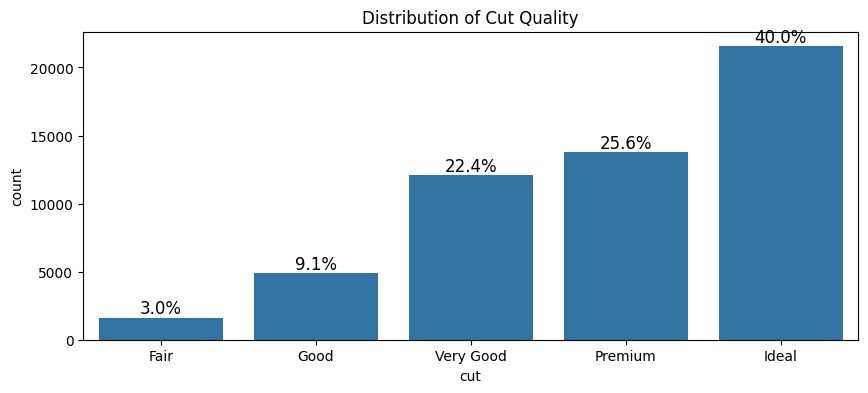

In [7]:
# Bar plots to show frequency distribution of the variable "cut":
total = len(df)
plt.figure(figsize=(10,4))
ax = sns.countplot(x='cut', data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

# Adding data labels
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.title("Distribution of Cut Quality")
plt.show()

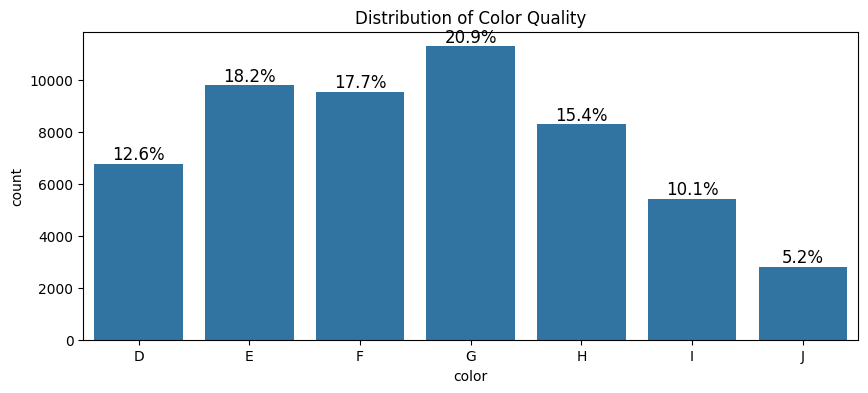

In [9]:
# Bar plots to show frequency distribution of the variable "color":
total = len(df)
plt.figure(figsize=(10,4))
ax = sns.countplot(x='color', data=df, order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])

# Adding data labels
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black') # Formatting
plt.title("Distribution of Color Quality")
plt.show()

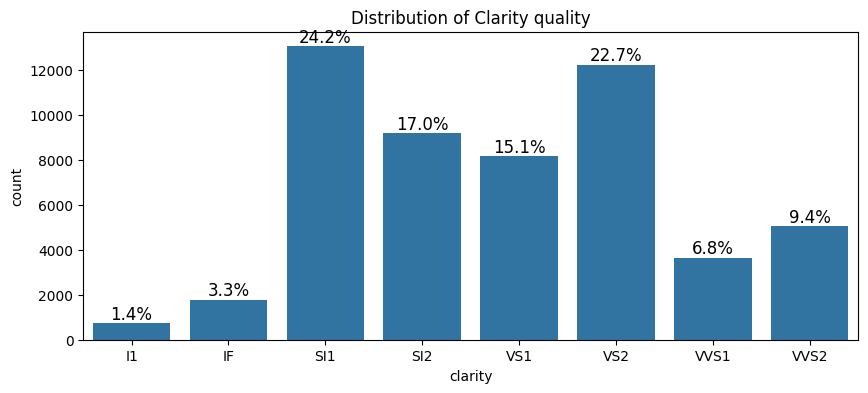

In [10]:
# Bar plots to show frequency distribution of the variable "clarity":
total = len(df)
plt.figure(figsize=(10,4))
ax = sns.countplot(x='clarity', data=df, order=['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'])

# Adding data labels
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2, p.get_height()), # Position (center of bar)
                ha='center', va='bottom', fontsize=12, color='black') # Formatting
plt.title("Distribution of Clarity quality")
plt.show()

# 3.b) Numerical Variables:

# Detecting Outliers in variables- "Price", "table" and "depth"

# 3.b.1) Histogram

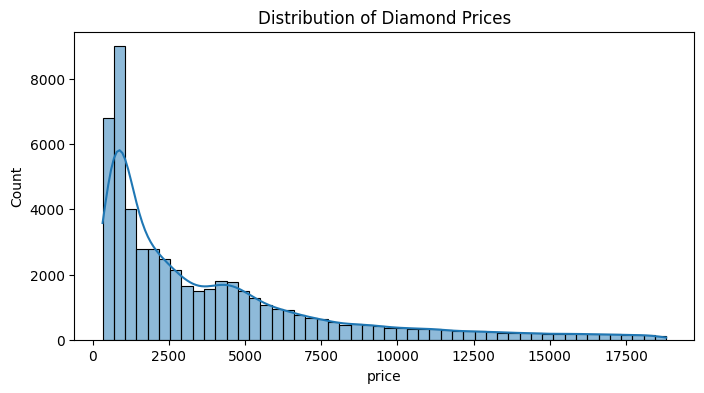

In [14]:
# Histogram to check distribution of price, carat, depth, table
plt.figure(figsize=(8,4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Diamond Prices")
plt.show()

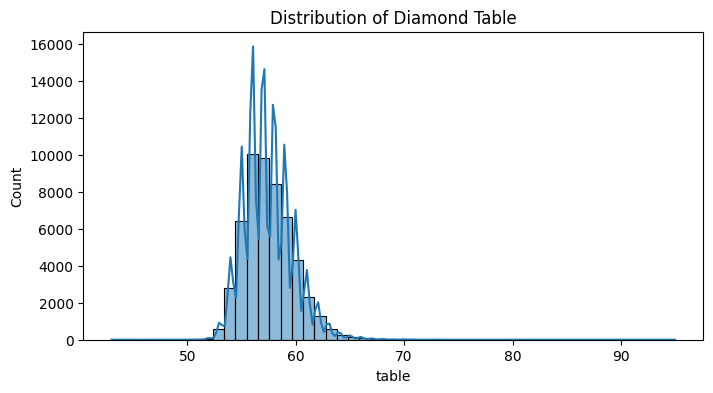

In [15]:
# Histogram to check distribution of price, carat, depth, table
plt.figure(figsize=(8,4))
sns.histplot(df['table'], bins=50, kde=True)
plt.title("Distribution of Diamond Table")
plt.show()

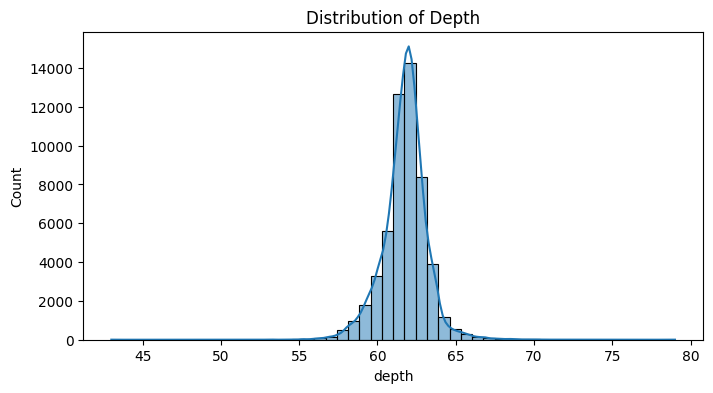

In [16]:
# Histogram to check distribution of price, carat, depth, table
plt.figure(figsize=(8,4))
sns.histplot(df['depth'], bins=50, kde=True)
plt.title("Distribution of Depth")
plt.show()

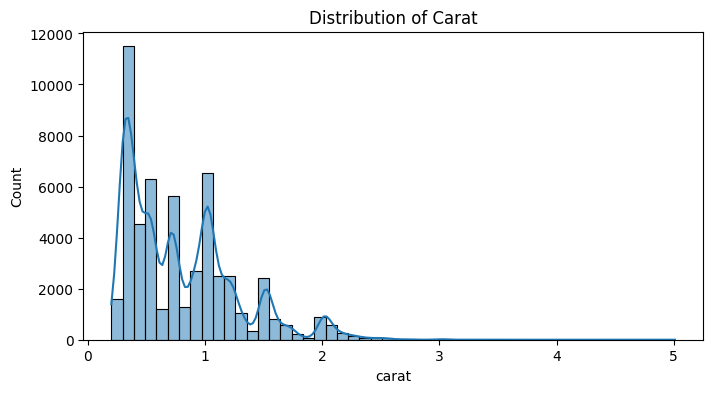

In [19]:
# Histogram to check distribution of price, carat, depth, table
plt.figure(figsize=(8,4))
sns.histplot(df['carat'], bins=50, kde=True)
plt.title("Distribution of Carat")
plt.show()

In [11]:
from scipy.stats import skew, kurtosis

print(f"Skewness: {skew(df['price']):.2f}, Kurtosis: {kurtosis(df['price']):.2f}")

ModuleNotFoundError: No module named 'scipy'

# 3.b.2) Box Plot

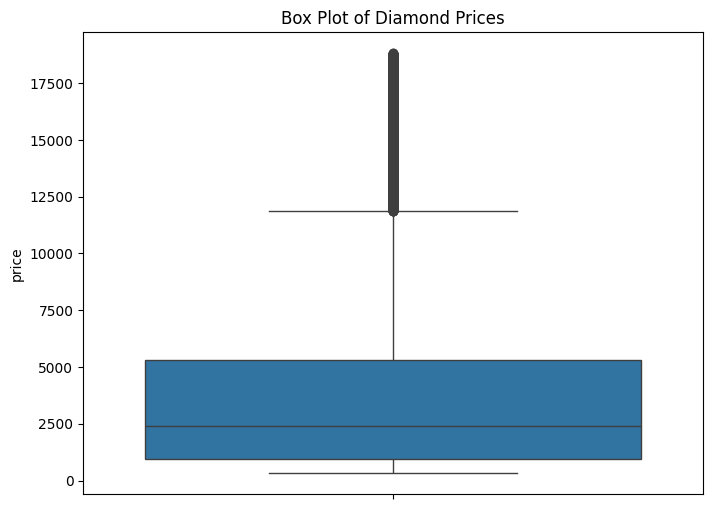

In [14]:
# Creating the box plot to odentify the univariate outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['price'])
plt.title("Box Plot of Diamond Prices")
plt.show()

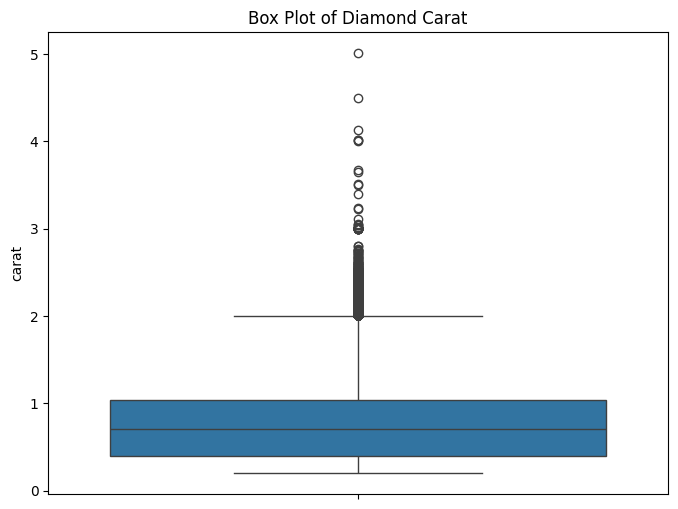

In [15]:
# Creating the box plot to identify the univariate outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['carat'])
plt.title("Box Plot of Diamond Carat")
plt.show()

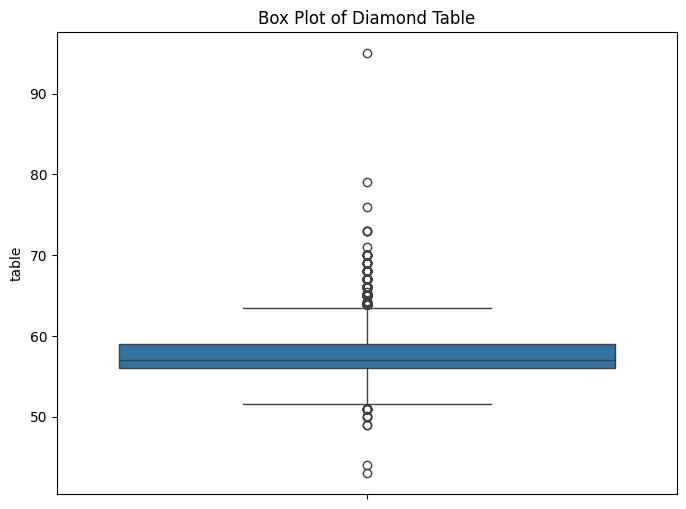

In [16]:
# Creating the box plot to identify the univariate outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['table'])
plt.title("Box Plot of Diamond Table")
plt.show()

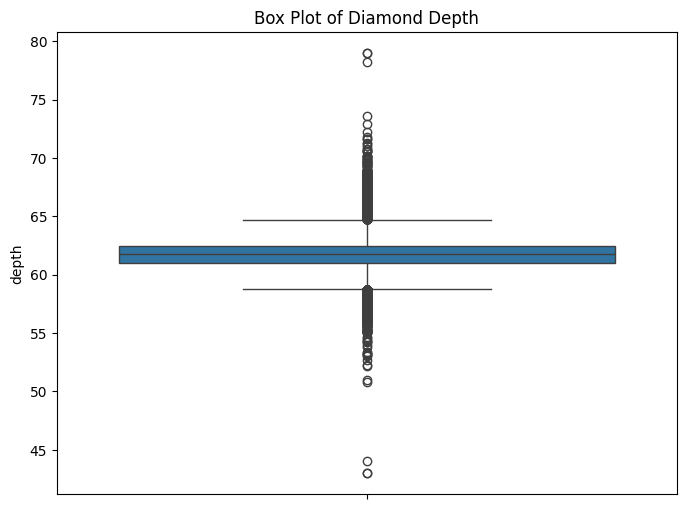

In [17]:
# Creating the box plot to identify the univariate outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['depth'])
plt.title("Box Plot of Diamond Depth")
plt.show()

# 4. Bivariate Analysis (Relationship Between Two Variables)

# 4.a) Numerical vs Numerical

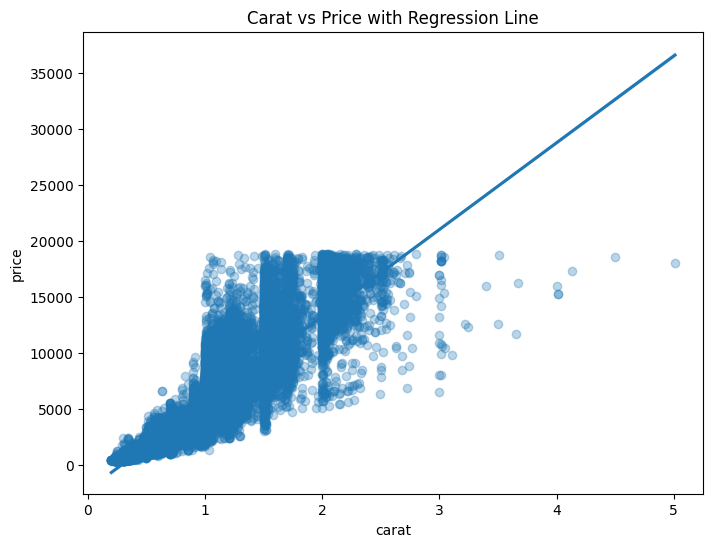

In [28]:
# Scatter plot of carat vs price (to see how price depends on carat)
# Scatter plot with Regression Line for Carat vs Price
plt.figure(figsize=(8,6))
sns.regplot(x="carat", y="price", data=df, scatter_kws={'alpha':0.3})
plt.title("Carat vs Price with Regression Line")
plt.show()

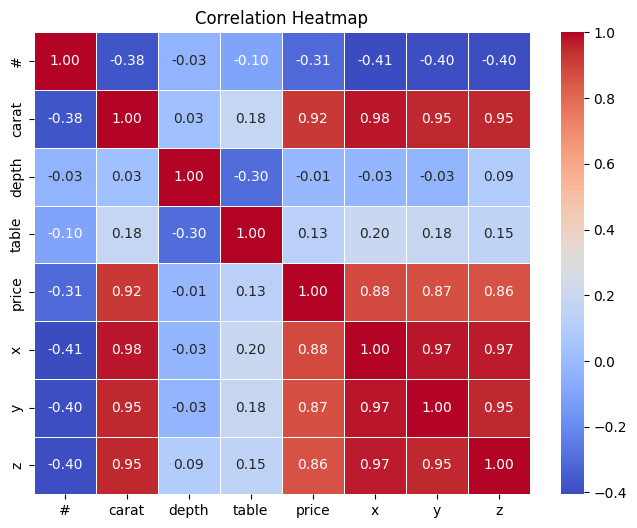

In [47]:
# Correlation heatmap (for numerical variables)
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 4.b) Categorical vs Numerical

DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

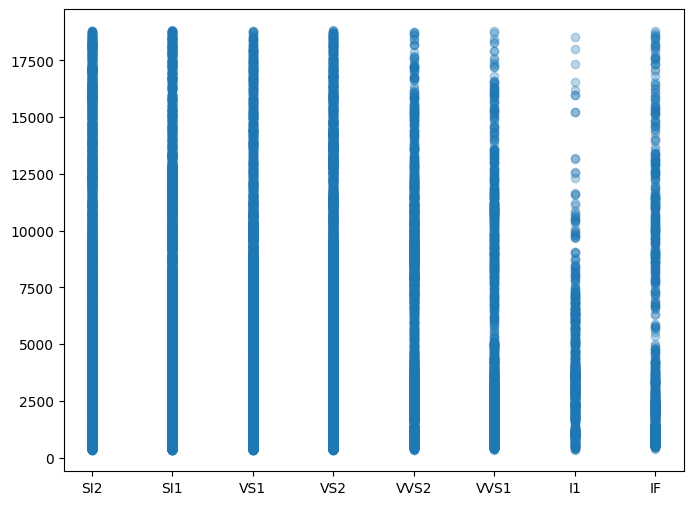

In [27]:
# Box plot of price across different cut categories
plt.figure(figsize=(8,6))
sns.regplot(x="clarity", y="price", data=df, scatter_kws={'alpha':0.3})
plt.title("Clarity vs Price with Regression Line")
plt.show()

In [ ]:
# Box plot of price across different clarity categories
plt.figure(figsize=(8,6))
sns.boxplot(x='clarity', y='price', data=df, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title("Price Distribution by Cut")
plt.show()

# 5. Multivariate Analysis

# 5.a) Pairplot to see relationships

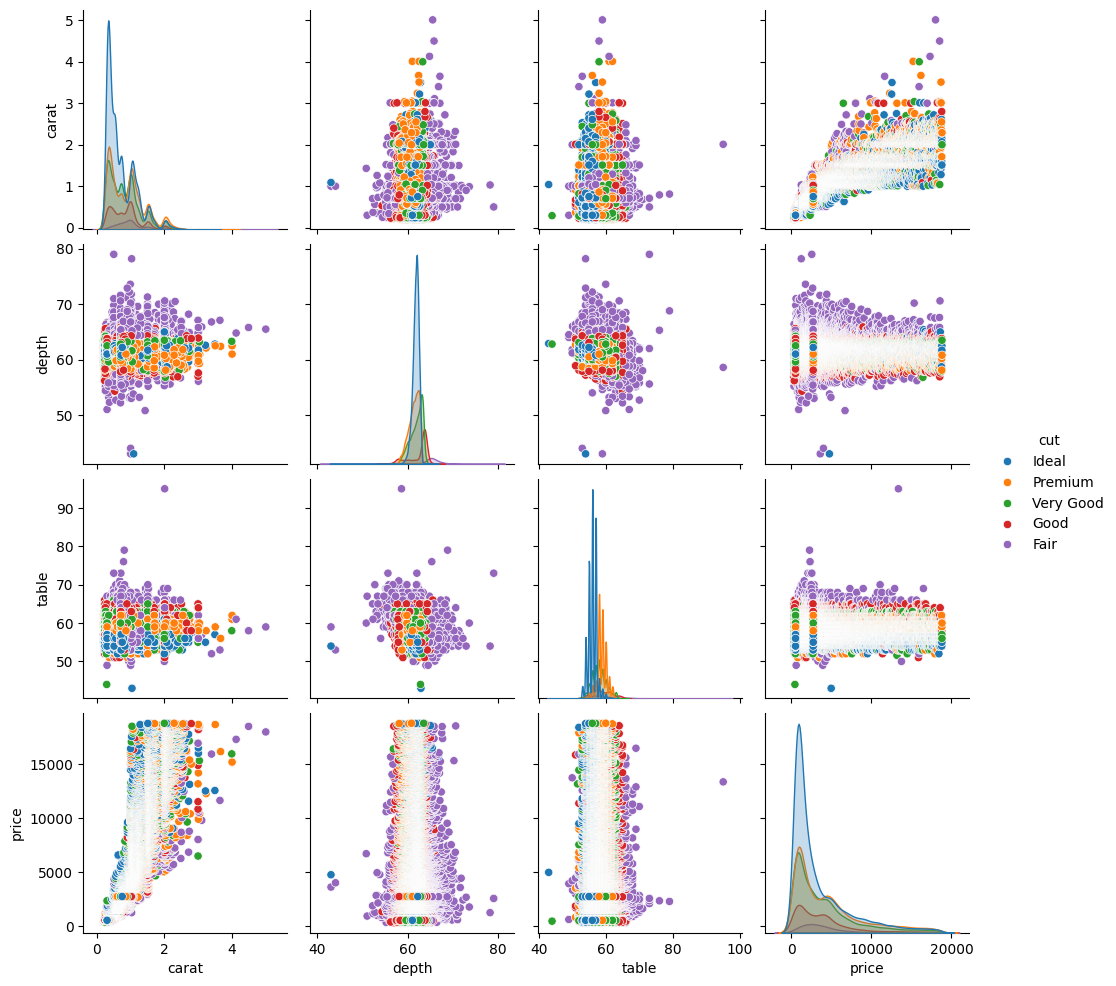

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (example using seaborn's built-in 'diamonds' dataset)
df = sns.load_dataset("diamonds")

# Plot pairplot with 'cut' as hue
sns.pairplot(df[['carat', 'depth', 'table', 'price', 'cut']], hue='cut')

# Show the plot
plt.show()

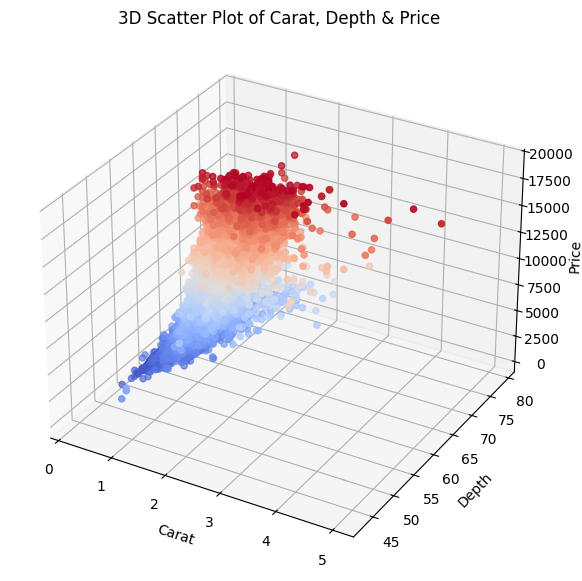

In [21]:
# 3D Scatter Plot (For Better Visualization of 3 Variables Together)
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['carat'], df['depth'], df['price'], c=df['price'], cmap='coolwarm')
ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Price')
plt.title("3D Scatter Plot of Carat, Depth & Price")
plt.show()